In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,259900.0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,INLAND,70500.0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,INLAND,117800.0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,INLAND,185400.0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN,94200.0
...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,INLAND,226800.0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,INLAND,52500.0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,NEAR BAY,130400.0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,<1H OCEAN,165300.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

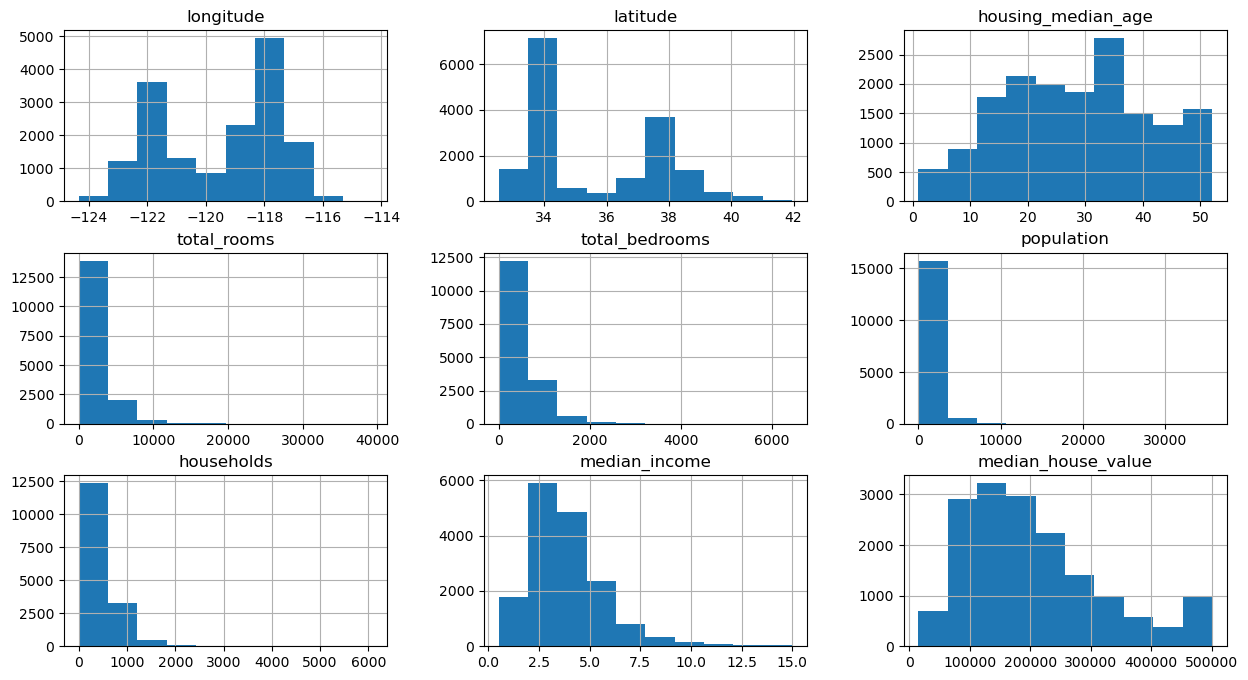

In [11]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

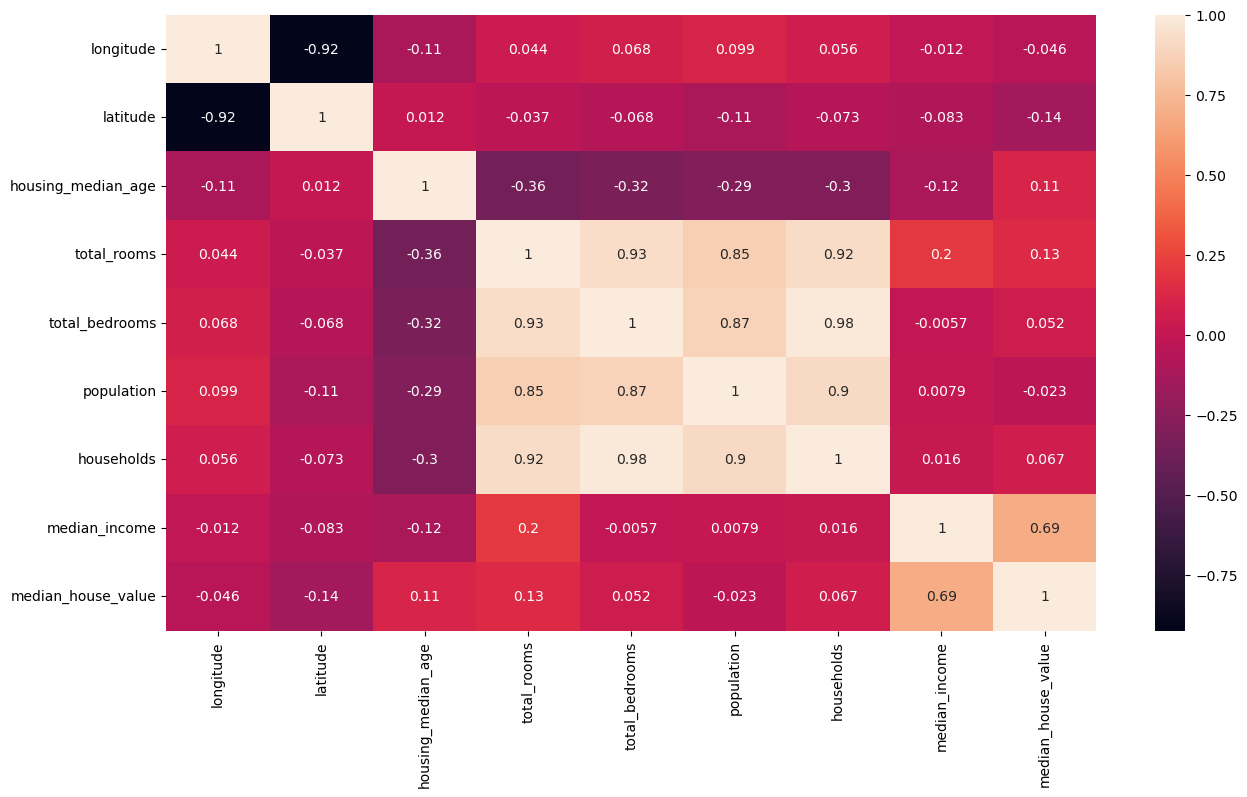

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

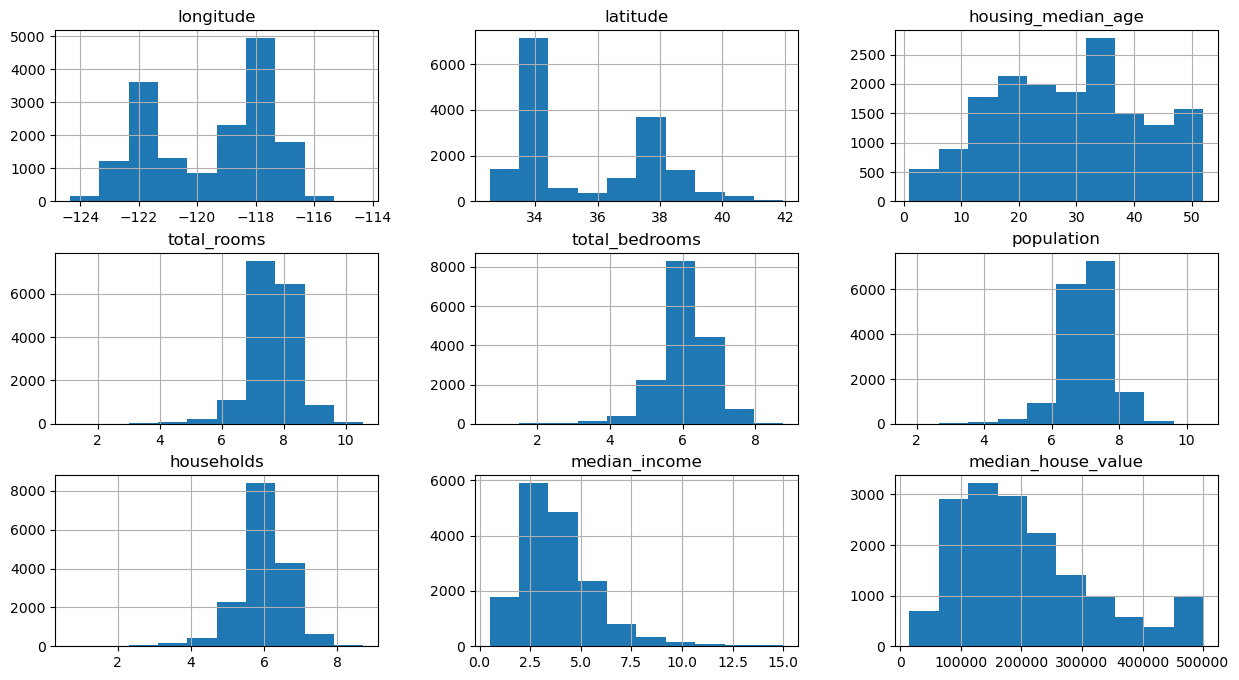

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7211
INLAND        5202
NEAR OCEAN    2114
NEAR BAY      1815
ISLAND           4
Name: ocean_proximity, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15610,-116.87,32.72,13.0,8.092239,6.198479,7.266827,6.222576,5.7652,259900.0,1,0,0,0,0
12478,-121.48,38.59,52.0,7.079184,5.834811,6.946014,5.771441,1.6116,70500.0,0,1,0,0,0
5996,-117.73,34.09,36.0,7.342132,5.697093,7.212294,5.717028,3.5313,117800.0,0,1,0,0,0
11827,-121.02,39.01,17.0,8.473659,6.684612,7.633854,6.647688,3.9734,185400.0,0,1,0,0,0
5183,-118.26,33.94,41.0,7.320527,6.018593,7.250636,5.966147,1.6500,94200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,8.371936,6.654153,7.299797,6.498282,6.0758,226800.0,0,1,0,0,0
19844,-119.09,36.42,17.0,6.777647,5.393628,6.874198,5.389072,2.0000,52500.0,0,1,0,0,0
9944,-122.26,38.16,23.0,7.951911,6.198479,7.369601,6.146329,4.0337,130400.0,0,0,0,1,0
10908,-117.86,33.74,9.0,6.265301,5.147494,7.137278,5.111988,3.3750,165300.0,1,0,0,0,0


<AxesSubplot:>

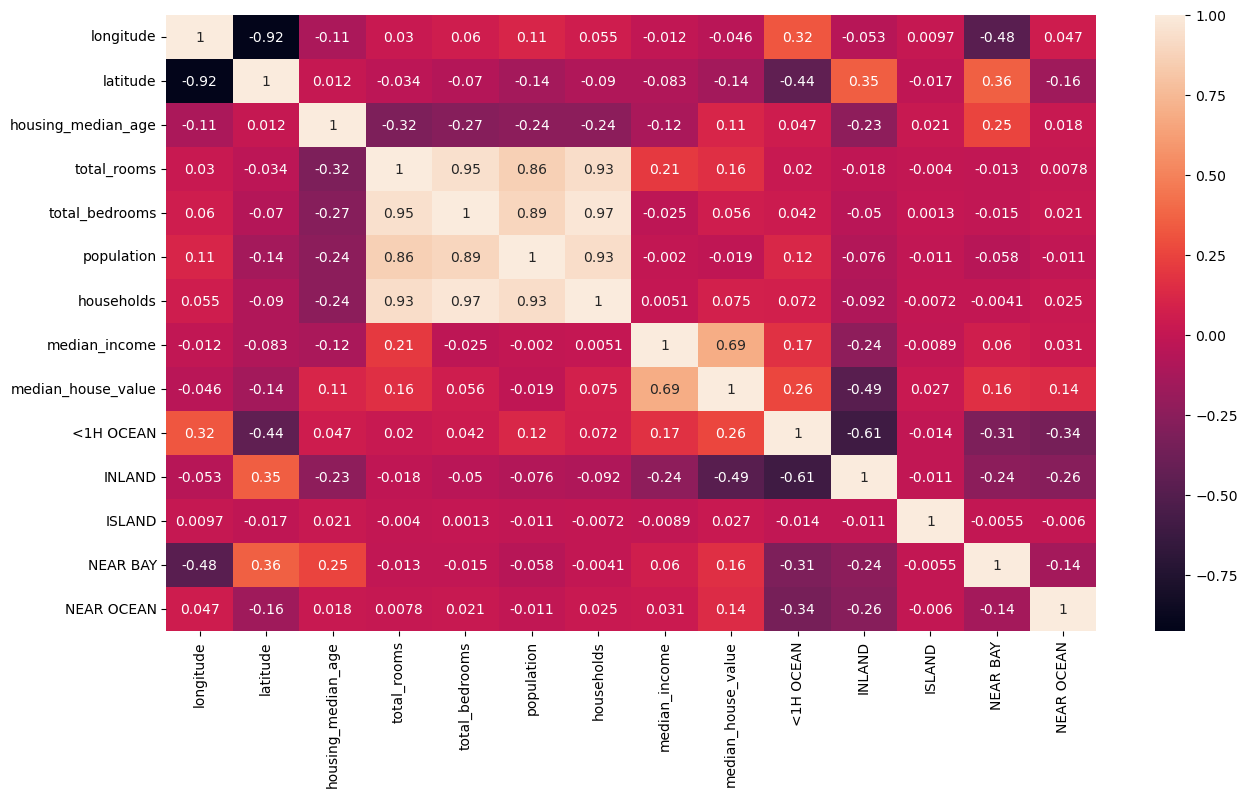

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

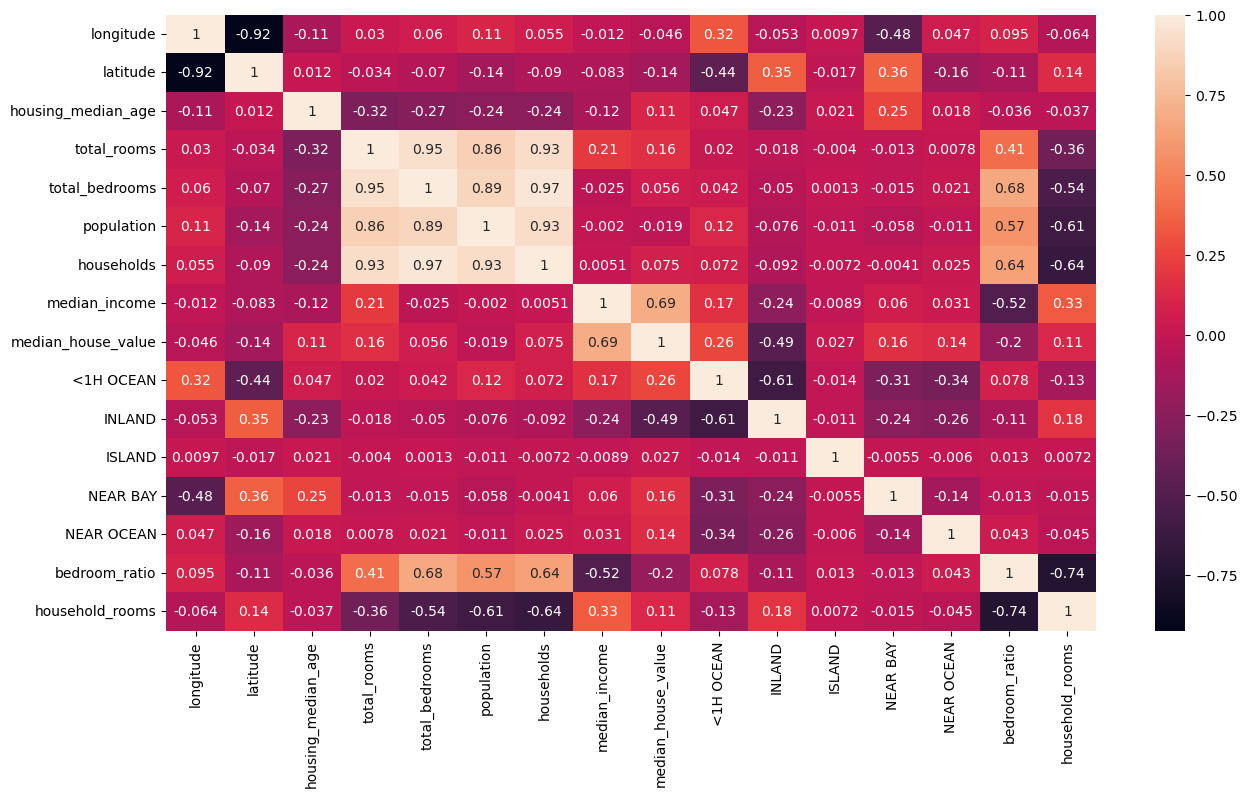

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

x_train_s = scaler.fit_transform(x_train)
model = LinearRegression()

model.fit(x_train_s, y_train)

LinearRegression()

In [22]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [23]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14185,-117.08,32.70,37.0,7.685703,6.037871,7.171657,5.929589,2.8750,98900.0,0,0,0,0,1,0.785598,1.296161
6125,-117.91,34.11,20.0,8.058011,6.529419,7.781973,6.570883,3.5250,153000.0,1,0,0,0,0,0.810302,1.226321
14095,-117.10,32.75,11.0,7.780721,6.588926,7.552762,6.568078,1.3448,91300.0,0,0,0,0,1,0.846827,1.184627
14359,-117.22,32.74,52.0,7.139660,5.313206,6.320768,5.347108,7.2758,345200.0,0,0,0,0,1,0.744182,1.335238
18004,-121.99,37.29,32.0,7.983099,6.177944,7.198184,6.177944,6.4631,344100.0,1,0,0,0,0,0.773878,1.292193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19533,-120.91,37.66,36.0,7.186144,5.545177,6.580639,5.451038,2.6523,76300.0,0,1,0,0,0,0.771648,1.318307
7695,-118.11,33.96,29.0,7.932003,6.368187,7.153834,6.311735,4.3882,261600.0,1,0,0,0,0,0.802847,1.256707
15558,-117.07,33.12,12.0,7.805475,6.396930,7.132498,6.272877,2.4122,127000.0,1,0,0,0,0,0.819544,1.244321
16731,-120.49,35.35,17.0,8.020928,6.411818,7.284821,6.302619,3.1641,158600.0,1,0,0,0,0,0.799386,1.272634


In [24]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [25]:
x_test_s = scaler.transform(x_test)

In [26]:
model.score(x_test_s, y_test)

0.6779546119824016

In [27]:
from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor()
model_1.fit(x_train_s, y_train)

RandomForestRegressor()

In [28]:
model_1.score(x_test_s, y_test)

0.8145514709101433